Here go the imports

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Functions to create and clean the dataframe

In [40]:
def get_df():
    df = pd.read_csv("googleplaystore.csv")
    #this is a manually detected bad row
    df = df.drop(index=10472)
    return df

def clean_df(df):
    #this function cleans the columns in order
    #first make a copy of the df
    df = df.copy()
    
    #App is alright

    #Category needs to be a category dtype
    df["Category"] = df["Category"].astype("category")

    #Rating is alright

    #Reviews needs to be int dtype
    df["Reviews"] = convert_reviews_to_int(df["Reviews"])

    #Size needs to be float dtype
    df["Size"] = size_convert_to_float(df["Size"])

    #Installs needs to be int dtype
    df["Installs"] = installs_convert_to_int(df["Installs"])

    #Type needs to be category dtype
    df["Type"] = df["Type"].astype("category")

    #Price needs to be float dtype
    df["Price"] = price_convert_to_float(df["Price"])

    #Content rating needs to be category dtype
    df["Content Rating"] = df["Content Rating"].astype("category")

    #Genres needs to be lists
    df["Genres"] = genres_convert_to_lists(df["Genres"])

    #Last updated needs to be list dtype
    df["Last Updated"] = df["Last Updated"].apply(pd.to_datetime)

    #Current Ver needs to be category dtype
    df["Current Ver"] = df["Current Ver"].astype("category")

    #Android Ver needs to be category dtype
    df["Android Ver"] = df["Android Ver"].astype("category")

    return df

def convert_reviews_to_int(reviews):
    reviews = reviews.copy()
    reviews = reviews.apply(pd.to_numeric, errors="ignore")

    for i, value in enumerate(reviews):
        if type(value) == type("string"):
            if value[-1] == "M":
                new_value = int(float(value[:-1]) * 1000000)
                reviews[i] = new_value

    return reviews.apply(pd.to_numeric)

def size_turn_value_to_float(value):
    if value[-1] == "M":
        return float(value[:-1]) * 1000000
    elif value[-1] == "k":
        return float(value[:-1]) * 1000
    elif value[-1] == "+":
        return float(value[:-1].replace(",", ""))
    else:
        return value

def size_convert_to_float(size):
    size = size.copy()
    size = size.apply(size_turn_value_to_float)
    size = size.apply(pd.to_numeric, errors="coerce")
    return size

def installs_convert_value_to_int(value):
    if value[-1] == "+":
        return int(value[:-1].replace(",", ""))
    elif value == "0":
        return int(value)
    else:
        return value

def installs_convert_to_int(installs):
    installs = installs.copy()
    installs = installs.apply(installs_convert_value_to_int)
    installs = installs.apply(pd.to_numeric)
    return installs

def price_convert_value_to_float(value):
    if value == "0":
        return float(value)
    elif value[0] == "$":
        return float(value[1:])
    else:
        return value

def price_convert_to_float(price):
    price = price.copy()
    price = price.apply(price_convert_value_to_float)
    price = price.apply(pd.to_numeric)
    return price

def genres_seperate_doubles(value):
    if (loc := value.find(";")) == -1:
        return [value]
    else:
        return [value[:loc], value[loc + 1:]]


def genres_convert_to_lists(genres):
    genres = genres.copy()
    genres = genres.apply(genres_seperate_doubles)
    return genres





Create and clean the df

In [41]:
play_df = get_df()
play_df_clean = clean_df(play_df)

Experimenting with the df

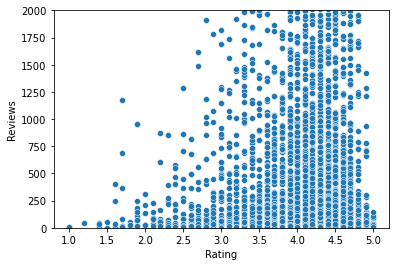

In [49]:
sns.scatterplot(y="Reviews", x="Rating", data=play_df_clean)
plt.ylim(0, 2000)
plt.show()

In [42]:
play_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  category      
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  category      
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  category      
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  category      
 12  Android Ver     10838 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 915.3+ KB
